In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/predictive_maintenance.csv')

In [3]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("seaborn",sns.__version__)
import sklearn
print("sklearn",sklearn.__version__)

numpy 1.26.4
pandas 2.2.2
seaborn 0.13.2
sklearn 1.5.2


In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
unique_failure_types = df[df['Target'] == 1]['Failure Type'].unique()
print(unique_failure_types)

['Power Failure' 'Tool Wear Failure' 'Overstrain Failure' 'No Failure'
 'Heat Dissipation Failure']


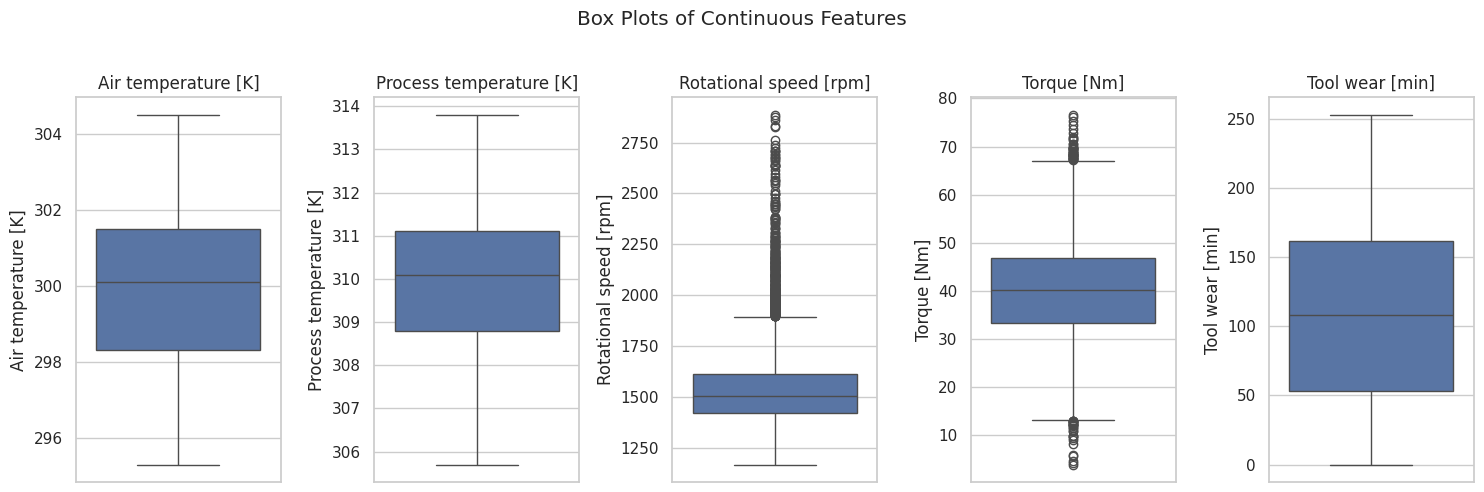

In [7]:
sns.set(style="whitegrid")

# Continuous feature columns as per dataset
continuous_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
#  Box Plots for Outliers
fig, axes = plt.subplots(1, len(continuous_features), figsize=(15, 5))
fig.suptitle("Box Plots of Continuous Features")
for i, feature in enumerate(continuous_features):
    sns.boxplot(y=df[feature], ax=axes[i])
    axes[i].set_title(feature)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


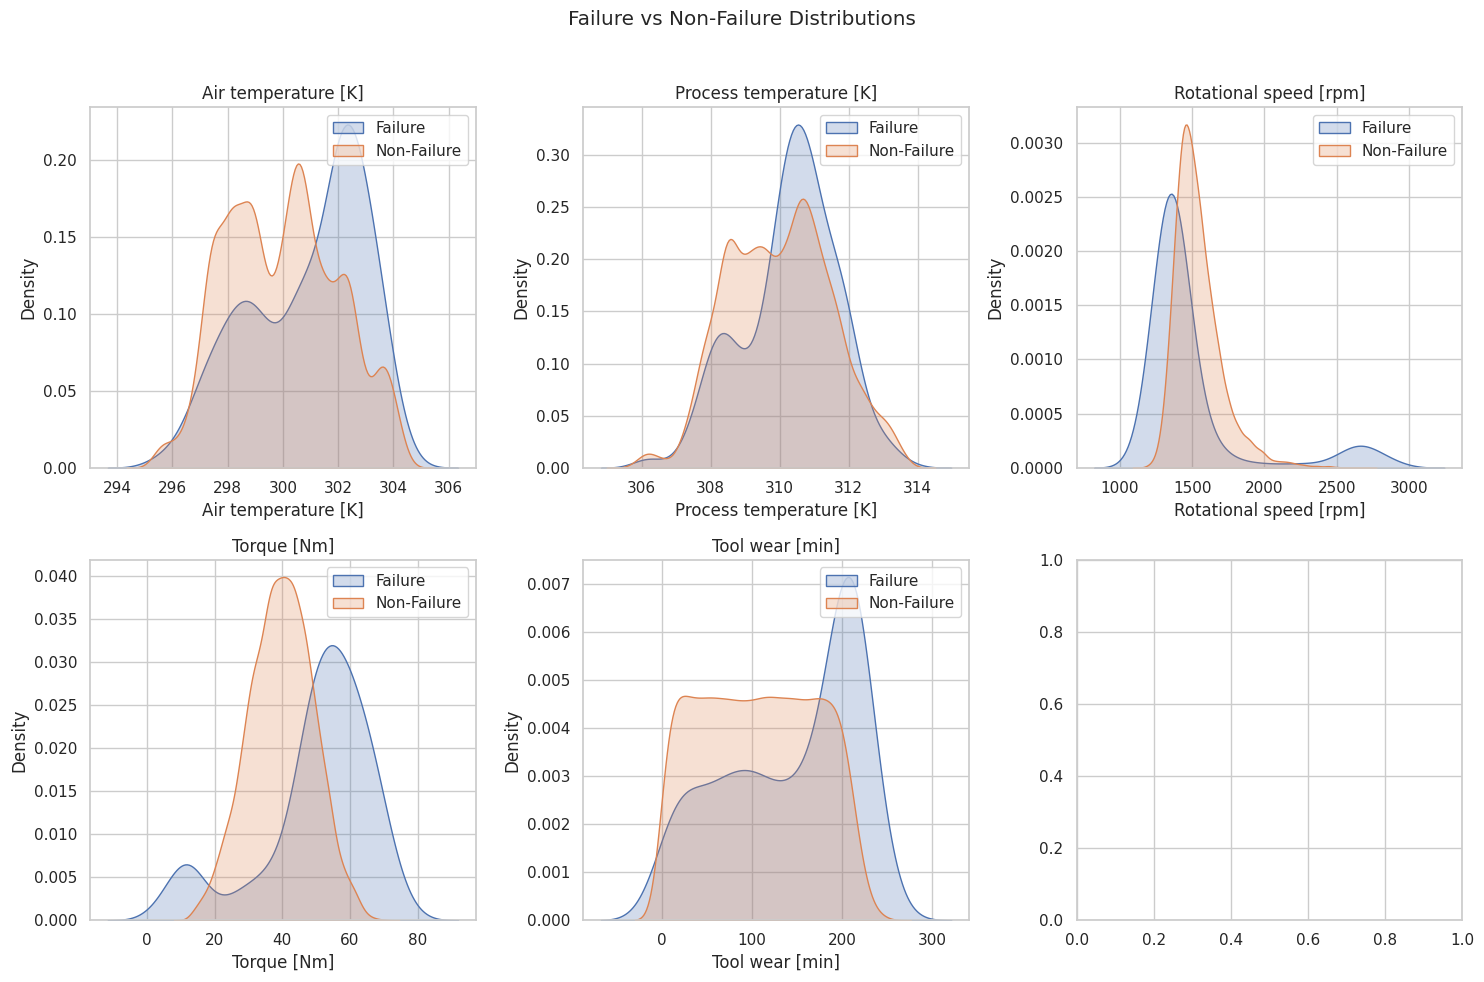

In [8]:
# Failure vs. Non-Failure Feature Distributions
failure_data = df[df['Target'] == 1]
non_failure_data = df[df['Target'] == 0]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Failure vs Non-Failure Distributions")
for i, feature in enumerate(continuous_features):
    sns.kdeplot(failure_data[feature], ax=axes[i // 3, i % 3], label='Failure', fill=True)
    sns.kdeplot(non_failure_data[feature], ax=axes[i // 3, i % 3], label='Non-Failure', fill=True)
    axes[i // 3, i % 3].set_title(feature)
    axes[i // 3, i % 3].legend()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
print(df["Target"].value_counts())

Target
0    9661
1     339
Name: count, dtype: int64


In [10]:
print(df["Failure Type"].value_counts())

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [12]:
print(df["Type"].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


In [13]:
pd.crosstab(df["Target"], df["Failure Type"])

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Target,,,,,,
0,0,9643,0,0,18,0
1,112,9,78,95,0,45


In [14]:
df.loc[df["Failure Type"] == "Random Failures", "Target"] = 1

# Drop rows where "Target" is 1 and "Failure Type" is "No Failure"
df.drop(df.loc[(df["Target"] == 1) & (df["Failure Type"] == "No Failure")].index, inplace=True)

In [15]:
pd.crosstab(df["Target"], df["Failure Type"])

Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Target,,,,,,
0,0,9643,0,0,0,0
1,112,0,78,95,18,45


In [16]:
# Create new columns that converts the column "Air Temperature [K]" and "Process Temperature [K]" to Celsius [C]
df["Air temperature [C]"] = df["Air temperature [K]"] - 273.15

df["Process temperature [C]"] = df["Process temperature [K]"] - 273.15

In [17]:
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Air temperature [C],Process temperature [C]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,24.95,35.45
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,25.05,35.55
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,24.95,35.35
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,25.05,35.45
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,25.05,35.55


In [18]:
df["Air temperature [K]"] = df["Air temperature [C]"]
df["Process temperature [K]"] = df["Process temperature [C]"]

# Drop Celsius columns
df = df.drop(columns=["Air temperature [C]", "Process temperature [C]"])

# Rename columns
df = df.rename(columns={
    "Air temperature [K]": "Air temperature [C]",
    "Process temperature [K]": "Process temperature [C]"
})
df.head()

,UDI,Product ID,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,24.95,35.45,1551,42.8,0,0,No Failure
1,2,L47181,L,25.05,35.55,1408,46.3,3,0,No Failure
2,3,L47182,L,24.95,35.35,1498,49.4,5,0,No Failure
3,4,L47183,L,25.05,35.45,1433,39.5,7,0,No Failure
4,5,L47184,L,25.05,35.55,1408,40.0,9,0,No Failure


In [19]:
df = df.drop(columns=["Target","UDI","Product ID"])

In [20]:
df.head()

,Type,Air temperature [C],Process temperature [C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,24.95,35.45,1551,42.8,0,No Failure
1,L,25.05,35.55,1408,46.3,3,No Failure
2,L,24.95,35.35,1498,49.4,5,No Failure
3,L,25.05,35.45,1433,39.5,7,No Failure
4,L,25.05,35.55,1408,40.0,9,No Failure


In [21]:
# Rename Columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,type,air_temperature_[c],process_temperature_[c],rotational_speed_[rpm],torque_[nm],tool_wear_[min],failure_type
0,M,24.95,35.45,1551,42.8,0,No Failure
1,L,25.05,35.55,1408,46.3,3,No Failure
2,L,24.95,35.35,1498,49.4,5,No Failure
3,L,25.05,35.45,1433,39.5,7,No Failure
4,L,25.05,35.55,1408,40.0,9,No Failure


In [22]:
# Outlier Treatment
for feature in ['rotational_speed_[rpm]', 'torque_[nm]', 'tool_wear_[min]']:
   Q1 = df[feature].quantile(0.25)
   Q3 = df[feature].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   df[feature] = df[feature].clip(lower_bound, upper_bound)

In [23]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.1 MB/s eta 0:00:00


In [24]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['type','failure_type'])
df = encoder.fit_transform(df)
df.head()

,type,air_temperature_[c],process_temperature_[c],rotational_speed_[rpm],torque_[nm],tool_wear_[min],failure_type
0,1,24.95,35.45,1551.0,42.8,0,1
1,2,25.05,35.55,1408.0,46.3,3,1
2,2,24.95,35.35,1498.0,49.4,5,1
3,2,25.05,35.45,1433.0,39.5,7,1
4,2,25.05,35.55,1408.0,40.0,9,1


In [25]:
print(df["failure_type"].value_counts())

failure_type
1    9643
6     112
2      95
4      78
3      45
5      18
Name: count, dtype: int64


In [26]:
# 1-no
# 2-power
# 3-tool wear
# 4-overstrain
# 5-random
# 6-heat dissipation

In [27]:
df.head()

,type,air_temperature_[c],process_temperature_[c],rotational_speed_[rpm],torque_[nm],tool_wear_[min],failure_type
0,1,24.95,35.45,1551.0,42.8,0,1
1,2,25.05,35.55,1408.0,46.3,3,1
2,2,24.95,35.35,1498.0,49.4,5,1
3,2,25.05,35.45,1433.0,39.5,7,1
4,2,25.05,35.55,1408.0,40.0,9,1


In [28]:
print(df["failure_type"].value_counts())

failure_type
1    9643
6     112
2      95
4      78
3      45
5      18
Name: count, dtype: int64


In [29]:
X = df.drop(columns="failure_type" , axis=1)
y = df["failure_type"]

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_data = pd.concat([X_test, y_test], axis=1)

test_data.to_csv("test.csv", index=False)

print("Test data exported as test.csv")

Test data exported as test.csv


In [56]:
print(X_train)

      type  air_temperature_[c]  process_temperature_[c]  \
168      2                25.25                    35.15   
4604     2                29.75                    37.85   
8447     2                25.45                    36.95   
9529     2                25.95                    37.15   
4917     1                30.25                    39.05   
...    ...                  ...                      ...   
5739     1                29.05                    38.55   
5195     2                30.75                    39.85   
5394     1                29.65                    39.15   
860      3                22.95                    33.75   
7277     2                26.95                    37.05   

      rotational_speed_[rpm]  torque_[nm]  tool_wear_[min]  
168                   1433.0        62.30               20  
4604                  1820.0        24.60              128  
8447                  1439.0        49.90               17  
9529                  1459.0       

In [57]:
# check the shape
len(X_train), len(y_train), len(X_test), len(y_test)

(7992, 7992, 1999, 1999)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Put all models in a dictionary
models = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest Clf": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()  # Add Decision Tree
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed for reproducibility
    np.random.seed(42)
    # Make an empty dict to keep the model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [59]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.9609804902451226,
 'KNN': 0.9609804902451226,
 'Random Forest Clf': 0.9799899949974987,
 'Decision Tree': 0.9729864932466233}

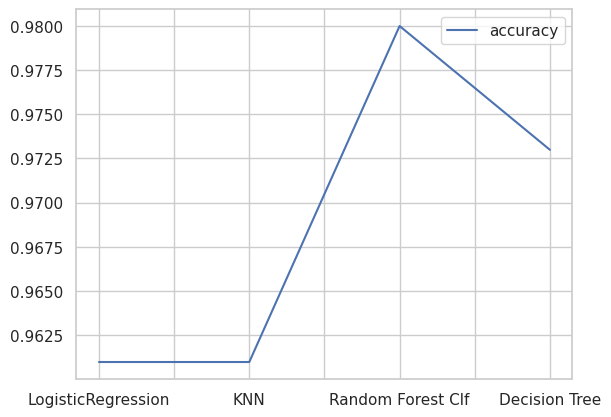

In [60]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.line();

In [61]:
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [62]:
np.random.seed(42)
rf_grid = {
    "n_estimators": np.arange(50, 500, 50),
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

from sklearn.model_selection import StratifiedKFold
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=StratifiedKFold(n_splits=5),
                           n_iter=20,
                           verbose=True)


# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   verbose=True)

In [63]:
rs_rf.best_params_


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [64]:
rs_rf_after_tuning = rs_rf.score(X_test, y_test)
print(f"Before tuning: {model_scores['Random Forest Clf']}")
print(f"After tuning: {rs_rf_after_tuning}")

Before tuning: 0.9799899949974987
After tuning: 0.9819909954977488


In [65]:
# hyperparameter grid for Decision Tree
dt_grid = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy", "log_loss"]
}

# RandomizedSearchCV for Decision Tree
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                           param_distributions=dt_grid,
                           cv=StratifiedKFold(n_splits=5),
                           n_iter=20,
                           verbose=True,
                           random_state=42)

# Fit the randomized search
rs_dt.fit(X_train, y_train)

# Evaluate Decision Tree
dt_score_after_tuning = rs_dt.score(X_test, y_test)
print(f"Decision Tree Best Params: {rs_dt.best_params_}")
print(f"Decision Tree Score After Tuning: {dt_score_after_tuning}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Decision Tree Best Params: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}
Decision Tree Score After Tuning: 0.9784892446223111


In [66]:
# hyperparameter grid for KNN
knn_grid = {
    "n_neighbors": np.arange(1, 30, 1),
    "weights": ["uniform", "distance"],
    "p": [1, 2]  # Minkowski distance metric (1: Manhattan, 2: Euclidean)
}

# RandomizedSearchCV for KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions=knn_grid,
                            cv=StratifiedKFold(n_splits=5),
                            n_iter=20,
                            verbose=True,
                            random_state=42)

# Fit the randomized search
rs_knn.fit(X_train, y_train)

# Evaluate KNN
knn_score_after_tuning = rs_knn.score(X_test, y_test)
print(f"KNN Best Params: {rs_knn.best_params_}")
print(f"KNN Score After Tuning: {knn_score_after_tuning}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
KNN Best Params: {'weights': 'distance', 'p': 1, 'n_neighbors': 12}
KNN Score After Tuning: 0.9639819909954978


In [67]:
# hyperparameter grid for Logistic Regression
lr_grid = {
    "C": np.logspace(-4, 4, 20),  # Regularization strength
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

# RandomizedSearchCV for Logistic Regression
rs_lr = RandomizedSearchCV(LogisticRegression(max_iter=5000),
                           param_distributions=lr_grid,
                           cv=StratifiedKFold(n_splits=5),
                           n_iter=20,
                           verbose=True,
                           random_state=42,
                           error_score="raise")

# Fit the randomized search
rs_lr.fit(X_train, y_train)

# Evaluating Logistic Regression
lr_score_after_tuning = rs_lr.score(X_test, y_test)
print(f"Logistic Regression Best Params: {rs_lr.best_params_}")
print(f"Logistic Regression Score After Tuning: {lr_score_after_tuning}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Logistic Regression Best Params: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1438.44988828766}
Logistic Regression Score After Tuning: 0.9659829914957478


In [68]:
import pandas as pd


model_scores = {
    "Random Forest Clf": 0.9799899949974987,
    "Decision Tree": 0.9729864932466233,
    "KNN": 0.9609804902451226,
    "Logistic Regression": 0.9609804902451226
}

# Tuned scores (after fitting RandomizedSearchCV)
tuned_scores = {
    "Random Forest Clf": rs_rf_after_tuning,
    "Decision Tree": dt_score_after_tuning,
    "KNN": knn_score_after_tuning,
    "Logistic Regression": lr_score_after_tuning
}

# DataFrame for comparison
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "KNN", "Logistic Regression"],
    "Before Tuning": [model_scores["Random Forest Clf"],
                      model_scores["Decision Tree"],
                      model_scores["KNN"],
                      model_scores["Logistic Regression"]],
    "After Tuning": [tuned_scores["Random Forest Clf"],
                     tuned_scores["Decision Tree"],
                     tuned_scores["KNN"],
                     tuned_scores["Logistic Regression"]]
})

print(comparison_df)

                 Model  Before Tuning  After Tuning
0        Random Forest       0.979990      0.981991
1        Decision Tree       0.972986      0.978489
2                  KNN       0.960980      0.963982
3  Logistic Regression       0.960980      0.965983


In [69]:
import joblib
from joblib import dump, load


In [70]:
joblib.dump(rs_rf.best_estimator_, "tuned_random_forest.joblib")
print("Model saved as tuned_random_forest.joblib")

Model saved as tuned_random_forest.joblib


In [71]:
from joblib import dump, load

model = load('tuned_random_forest.joblib')

In [72]:
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the saved model
loaded_model = joblib.load("tuned_random_forest.joblib")

# Make predictions on the test set
pickle_y_preds = loaded_model.predict(X_test)

# Function to evaluate predictions
def evaluate_preds(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")  # Use weighted for imbalanced data
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")

    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    return metrics

# Evaluate predictions
evaluation_results = evaluate_preds(y_test, pickle_y_preds)
print("Evaluation Results:", evaluation_results)


Evaluation Results: {'Accuracy': 0.9819909954977488, 'Precision': 0.9748416494254304, 'Recall': 0.9819909954977488, 'F1 Score': 0.9772313386093446}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
